In [68]:
%reload_ext autoreload
%autoreload 2
%matplotlib inline

In [69]:
#IMPORTS
from fastai.imports import *
from fastai.conv_learner import * 
from fastai.dataset import *

In [70]:
PATH = '../../../data/humanszombies/'

In [71]:
torch.cuda.is_available()

True

In [72]:
torch.backends.cudnn.enabled

True

In [73]:
os.listdir(PATH)

['train', 'valid', 'models', 'tmp', '.git', 'test']

In [74]:
files = os.listdir(f'{PATH}valid/zombies')[:5]

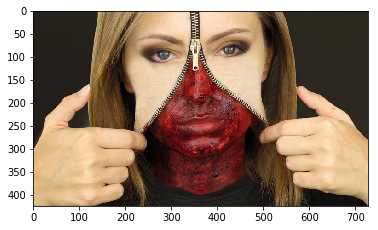

In [75]:
img = plt.imread(f'{PATH}valid/zombies/{files[0]}')
plt.imshow(img)

In [76]:
img.shape

(424, 728, 3)

In [77]:
img[:4,:4]

array([[[37, 34, 29],
        [37, 34, 29],
        [37, 34, 29],
        [37, 34, 29]],

       [[37, 34, 29],
        [37, 34, 29],
        [37, 34, 29],
        [37, 34, 29]],

       [[37, 34, 29],
        [37, 34, 29],
        [37, 34, 29],
        [37, 34, 29]],

       [[37, 34, 29],
        [37, 34, 29],
        [37, 34, 29],
        [37, 34, 29]]], dtype=uint8)

In [78]:
arch=resnet34
size=224

In [79]:
data=ImageClassifierData.from_paths(PATH, tfms=tfms_from_model(arch,size))
learn=ConvLearner.pretrained(arch, data, precompute=True)
learn.fit(0.015,7)

epoch      trn_loss   val_loss   accuracy                
    0      0.697898   0.342286   0.886598  
    1      0.457038   0.263593   0.891753                
    2      0.361991   0.260536   0.891753                
    3      0.304965   0.265798   0.902062                
    4      0.260381   0.286974   0.891753                
    5      0.232168   0.298008   0.891753                
    6      0.207061   0.3422     0.876289                



[array([0.3422]), 0.8762886597938144]

In [80]:
data.val_y

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1])

In [81]:
data.classes


['humans', 'zombies']

In [82]:
log_preds=learn.predict()

In [83]:
log_preds.shape

(194, 2)

In [84]:
log_preds[:10]

array([[-0.03359, -3.41024],
       [-0.33149, -1.26532],
       [-0.00124, -6.69392],
       [-0.36193, -1.19182],
       [-0.119  , -2.18751],
       [-0.00372, -5.59513],
       [-0.00052, -7.56131],
       [-0.98963, -0.46476],
       [-0.00031, -8.08634],
       [-0.11444, -2.22437]], dtype=float32)

In [85]:
preds=np.argmax(log_preds,1)
preds[:10]

array([0, 0, 0, 0, 0, 0, 0, 1, 0, 0])

In [86]:
probs=np.exp(log_preds[:,1])

In [87]:
probs

array([0.03303, 0.28215, 0.00124, 0.30367, 0.1122 , 0.00372, 0.00052, 0.62829, 0.00031, 0.10814, 0.063  ,
       0.99859, 0.05357, 0.98759, 0.35617, 0.89347, 0.30555, 0.09146, 0.00082, 0.93705, 0.68091, 0.05372,
       0.27012, 0.00026, 0.96348, 0.54946, 0.98898, 0.00292, 0.01958, 0.95374, 0.00535, 0.00158, 0.06311,
       0.00017, 0.0195 , 0.00002, 0.00945, 0.98604, 0.00059, 0.90752, 0.00238, 0.00001, 0.00144, 0.10919,
       0.03403, 0.00538, 0.00005, 0.01586, 0.00737, 0.02957, 0.00004, 0.92785, 0.04421, 0.03504, 0.00006,
       0.24871, 0.00021, 0.00722, 0.03171, 0.04559, 0.00157, 0.00014, 0.90387, 0.02031, 0.00523, 0.00166,
       0.01721, 0.06525, 0.00113, 0.02635, 0.79371, 0.01025, 0.22781, 0.03952, 0.00131, 0.96739, 0.00256,
       0.01329, 0.83477, 0.02064, 0.03237, 0.00003, 0.11917, 0.05744, 0.00285, 0.02978, 0.2416 , 0.00105,
       0.09088, 0.00017, 0.00112, 0.04256, 0.17169, 0.03528, 0.04872, 0.05566, 0.0001 , 0.00635, 0.27187,
       0.99471, 0.99933, 0.97821, 0.89973, 0.9

In [88]:
def rand_by_mask(mask): return np.random.choice(np.where(mask)[0], min(len(preds), 4), replace=False)
def rand_by_correct(is_correct): return rand_by_mask((preds==data.val_y)==is_correct)

In [218]:
def plots(ims, titles=None, figuresize=(12,6), rows=1): 
    fig=plt.figure(figsize=figuresize)
    for x in range(len(ims)):
        sp = fig.add_subplot(rows, len(ims)//rows, x+1)
        if titles is not None: sp.set_title(titles[x], fontsize=16)
        plt.imshow(ims[x])

In [90]:
def load_imgs(ds, idx): return np.array(PIL.Image.open(PATH+ds.fnames[idx]))

In [219]:
def plot_val_with_title(idxs, title=None):
    imgs=[load_imgs(data.val_ds, x) for x in idxs]
    prob_titles=[probs[x] for x in idxs]
    print(title)
    return plots(imgs, prob_titles, (16,8), 1)

RANDOMLY KOREK TELINGA


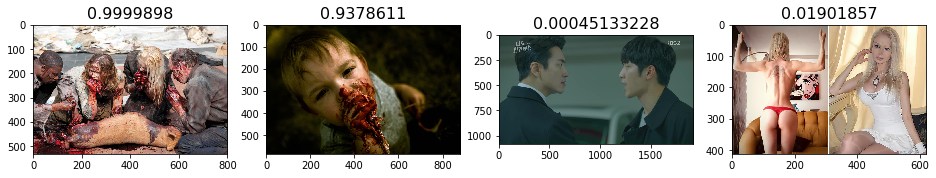

In [220]:
plot_val_with_title(rand_by_correct(True), "RANDOMLY KOREK TELINGA")

In [93]:
def most_by_mask(mask, mult):
    idxs=np.where(mask)[0]
    return idxs[np.argsort(mult * probs[idxs])[:4]]

In [94]:
def most_by_correct(y, is_correct):
    mult = -1 if (y==1)==is_correct else 1
    return most_by_mask(((preds==data.val_y)==is_correct) & (data.val_y==y), mult)

MOZ KOREK ZOMBIES


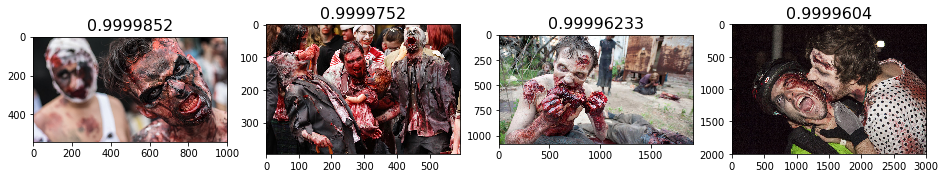

In [95]:
plot_val_with_title(most_by_correct(1, True), "MOZ KOREK ZOMBIES")

MOZ INKOREK ZOMBIES


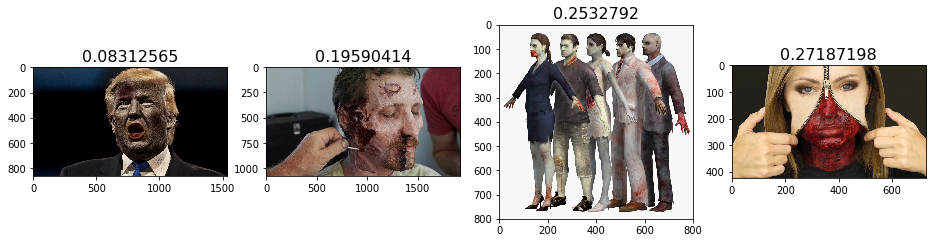

In [96]:
plot_val_with_title(most_by_correct(1, False), "MOZ INKOREK ZOMBIES")

MOZ KOREK HUMANZ


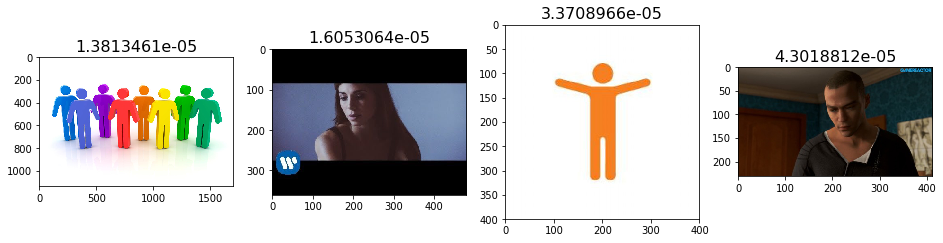

In [97]:
plot_val_with_title(most_by_correct(0, True), "MOZ KOREK HUMANZ")

MOZ INKOREK HUMANZ


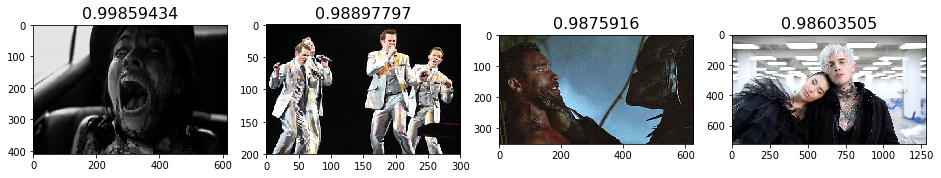

In [98]:
plot_val_with_title(most_by_correct(0, False), "MOZ INKOREK HUMANZ")

MOZ DUNNO


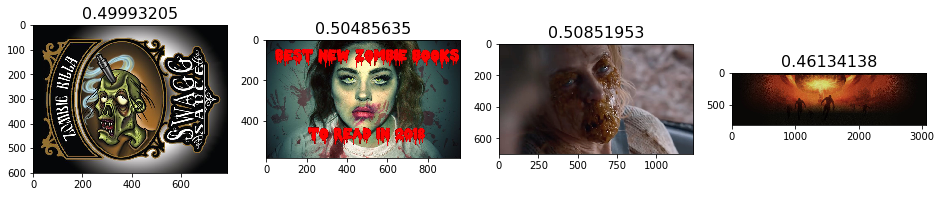

In [99]:
most_uncertain=np.argsort(abs(0.5-probs))[:4]
plot_val_with_title(most_uncertain, "MOZ DUNNO")

In [100]:
learn=ConvLearner.pretrained(arch, data, precompute=True)

In [101]:
lrf=learn.lr_find()

epoch      trn_loss   val_loss   accuracy                
    0      0.779431   46.124045  0.314433  



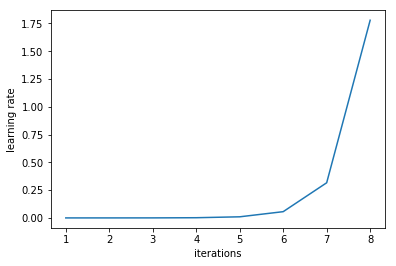

In [103]:
learn.sched.plot_lr()

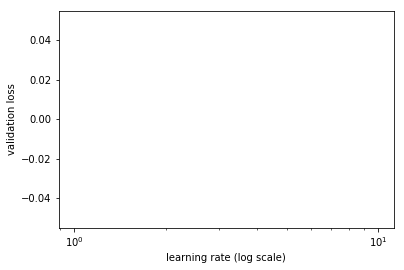

In [104]:
learn.sched.plot()

In [107]:
tfms=tfms_from_model(resnet34, size, aug_tfms=transforms_side_on, max_zoom=1.1)
def get_augs():
    data=ImageClassifierData.from_paths(PATH, bs=2, num_workers=1, tfms=tfms)
    x,_=next(iter(data.aug_dl))
    return(data.trn_ds.denorm(x)[1])

In [108]:
ims=np.stack([get_augs() for x in range(6)])

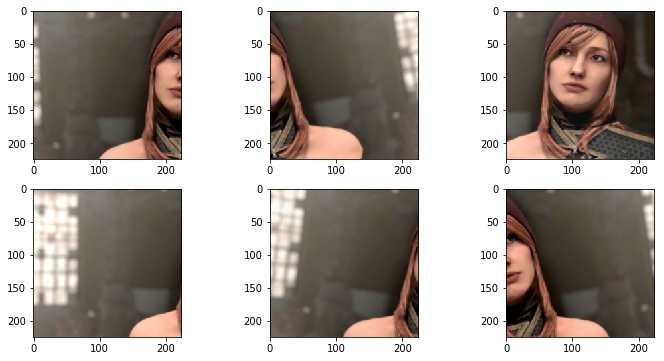

In [112]:
plots(ims, rows=2)

In [173]:
data=ImageClassifierData.from_paths(PATH, tfms=tfms)
learn=ConvLearner.pretrained(arch, data, precompute=True)

In [174]:
learn.fit(0.1, 1)

epoch      trn_loss   val_loss   accuracy               
    0      0.574478   0.434733   0.829897  



[array([0.43473]), 0.8298969072164949]

In [175]:
learn.precompute=False

In [176]:
learn.fit(1e-1, 3, cycle_len=1)

epoch      trn_loss   val_loss   accuracy                
    0      0.315533   0.408836   0.881443  
    1      0.34967    0.376551   0.881443                
    2      0.318533   0.40671    0.881443                



[array([0.40671]), 0.8814432989690721]

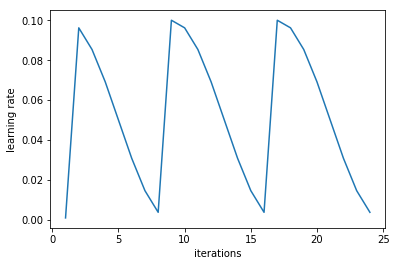

In [131]:
learn.sched.plot_lr()

In [177]:
learn.save('224_lastlayer')

In [178]:
learn.load('224_lastlayer')

In [179]:
learn.unfreeze()

In [180]:
lr=np.array([1e-4,1e-3,1e-2])

In [181]:
learn.fit(lr, 3, cycle_len=1, cycle_mult=2)

epoch      trn_loss   val_loss   accuracy                
    0      0.288019   0.38881    0.886598  
    1      0.272908   0.338121   0.886598                
    2      0.228022   0.337597   0.876289                
    3      0.20275    0.302836   0.896907                
    4      0.186549   0.299085   0.907216                
    5      0.195209   0.307573   0.891753                
    6      0.163348   0.297221   0.902062                



[array([0.29722]), 0.9020618556701031]

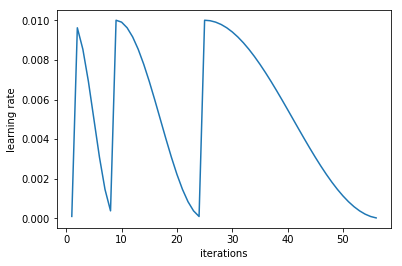

In [182]:
learn.sched.plot_lr()

In [183]:
learn.save('224_all')

In [184]:
learn.load('224_all')

In [185]:
log_preds,y=learn.TTA()

In [196]:
probs = np.mean(np.exp(log_preds),0)

In [188]:
probs

array([[0.96011, 0.03989],
       [0.9975 , 0.0025 ],
       [0.99997, 0.00003],
       [0.85176, 0.14824],
       [0.93071, 0.06929],
       [0.99606, 0.00394],
       [0.97319, 0.02681],
       [0.75658, 0.24342],
       [0.99977, 0.00023],
       [0.99263, 0.00737],
       [0.98128, 0.01872],
       [0.01094, 0.98906],
       [0.9878 , 0.0122 ],
       [0.32477, 0.67523],
       [0.95853, 0.04147],
       [0.56598, 0.43402],
       [0.70733, 0.29267],
       [0.25498, 0.74502],
       [0.99981, 0.00019],
       [0.8379 , 0.1621 ],
       [0.9837 , 0.0163 ],
       [0.67117, 0.32883],
       [0.9982 , 0.0018 ],
       [0.98549, 0.01451],
       [0.03585, 0.96415],
       [0.75808, 0.24192],
       [0.06548, 0.93452],
       [0.98101, 0.01899],
       [0.9994 , 0.0006 ],
       [0.19518, 0.80482],
       [0.9999 , 0.0001 ],
       [0.99995, 0.00005],
       [0.94888, 0.05112],
       [0.99928, 0.00072],
       [0.98033, 0.01967],
       [1.     , 0.     ],
       [0.93525, 0.06475],
 

In [189]:
accuracy_np(probs,y)

0.9226804123711341

In [203]:
preds=np.argmax(probs, axis=1)

In [204]:
probs=probs[:,1]

In [205]:
from sklearn.metrics import confusion_matrix

In [206]:
cm = confusion_matrix(y, preds)

In [208]:
from fastai.plots import *

[[86 12]
 [ 3 93]]


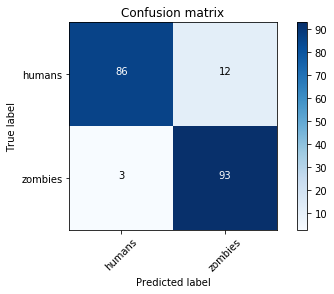

In [209]:
plot_confusion_matrix(cm, data.classes)

Most Incorrect Humans


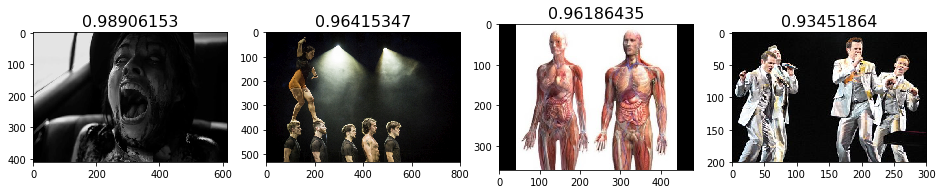

In [221]:
plot_val_with_title(most_by_correct(0, False), "Most Incorrect Humans")

Most Incorrect Zombies


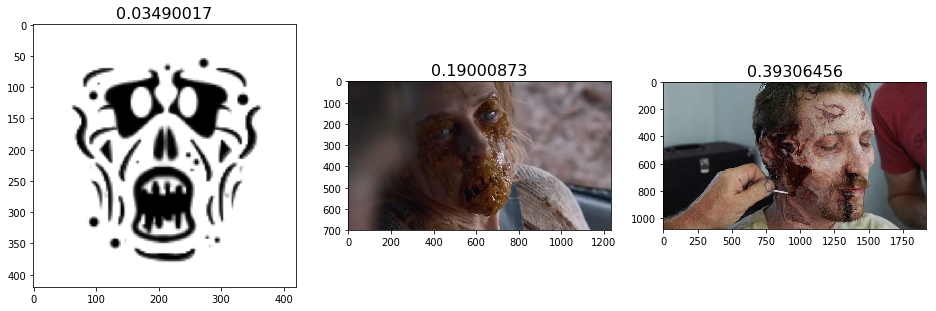

In [222]:
plot_val_with_title(most_by_correct(1, False), "Most Incorrect Zombies")

In [230]:
def binary_loss(y, preds):
    return np.mean(-((1-y)*np.log(1-preds) + y * np.log(preds)))

In [252]:
actuals = np.array([1,1,1,0])
predictions = np.array([0.791, 0.94, 0.910, 0.090])

In [253]:
binary_loss(actuals, predictions)

0.1212385184687633